# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [4]:
# Data exploration

attrition_data.shape

(1028, 34)

In [5]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

In [6]:
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [7]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [8]:
# check whether thier is null value are present or not
attrition_data["Attrition"].isna().sum()

0

In [0]:
# fill null with NaN values
attrition_data = attrition_data.fillna(np.nan)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
# Finding the number of distinct classes
attrition_data.Attrition.value_counts()

0    856
1    172
Name: Attrition, dtype: int64

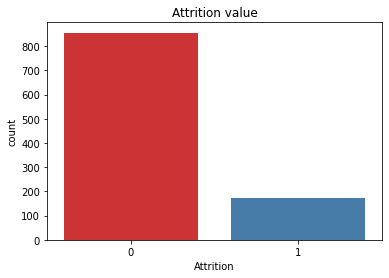

In [26]:
# Data visualization

sns.countplot(attrition_data['Attrition'], palette='Set1',color='blue')
plt.title("Attrition value")
plt.show()

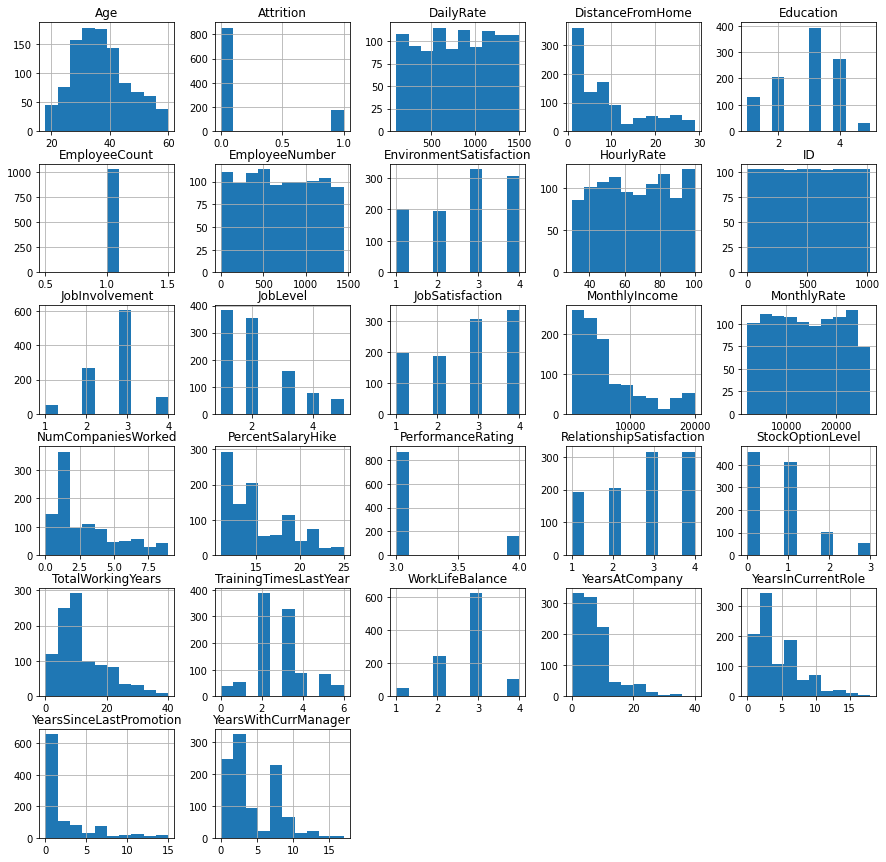

In [39]:
attrition_data.hist(figsize=(15,15))
plt.show()

In [0]:
attrition_data.corr?

In [44]:
from IPython.display import IFrame
wiki = IFrame(src="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient",width=1100,height=400)
display(wiki)

In [49]:
x = attrition_data.corr()
x.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
Age,1.000000,-0.168641,0.010270,-0.022883,0.181464,NaN,0.003173,0.033375,0.006313,0.042037,0.512325,-0.021383,0.503340,0.016969,0.313343,-0.025688,-0.037771,0.061905,0.006998,0.691968,-0.002472,-0.028193,0.317744,0.209906,0.215766,0.194178,0.002749
Attrition,-0.168641,1.000000,-0.050566,0.086875,-0.041021,NaN,0.026833,-0.119202,-0.018472,-0.158768,-0.169121,-0.097518,-0.163709,0.025739,0.037174,0.008138,0.005300,-0.050263,-0.160597,-0.178842,-0.038728,-0.064322,-0.133021,-0.159691,-0.031826,-0.151208,0.026794
DailyRate,0.010270,-0.050566,1.000000,0.023364,-0.049667,NaN,-0.072425,0.018301,0.025172,0.057859,0.009149,0.032010,0.015948,-0.042087,0.026531,0.031686,0.024503,-0.023635,0.042857,0.028833,0.004617,-0.066313,-0.042520,0.005374,-0.041213,-0.037282,-0.072765
DistanceFromHome,-0.022883,0.086875,0.023364,1.000000,0.012416,NaN,0.008191,-0.022668,0.056265,0.058609,-0.030509,0.002253,-0.048151,0.026314,-0.021968,0.041837,0.034268,0.005861,0.043912,-0.025257,-0.007631,-0.053905,-0.029847,-0.004379,-0.008735,-0.004795,0.008636
Education,0.181464,-0.041021,-0.049667,0.012416,1.000000,NaN,-0.002240,0.006558,0.022398,0.028283,0.098366,0.003848,0.098867,-0.049857,0.133409,-0.018768,-0.039675,0.014048,-0.003790,0.133525,-0.036168,0.011091,0.061348,0.075898,0.072333,0.086565,-0.001705


Note :

Here we can see that correlation values between any two attribute is greater > `0.5` consider as _**positive correlation**_
and < `0.5` consider as _**negative correlation**_ , we can see that values in heatmap with `orange` color

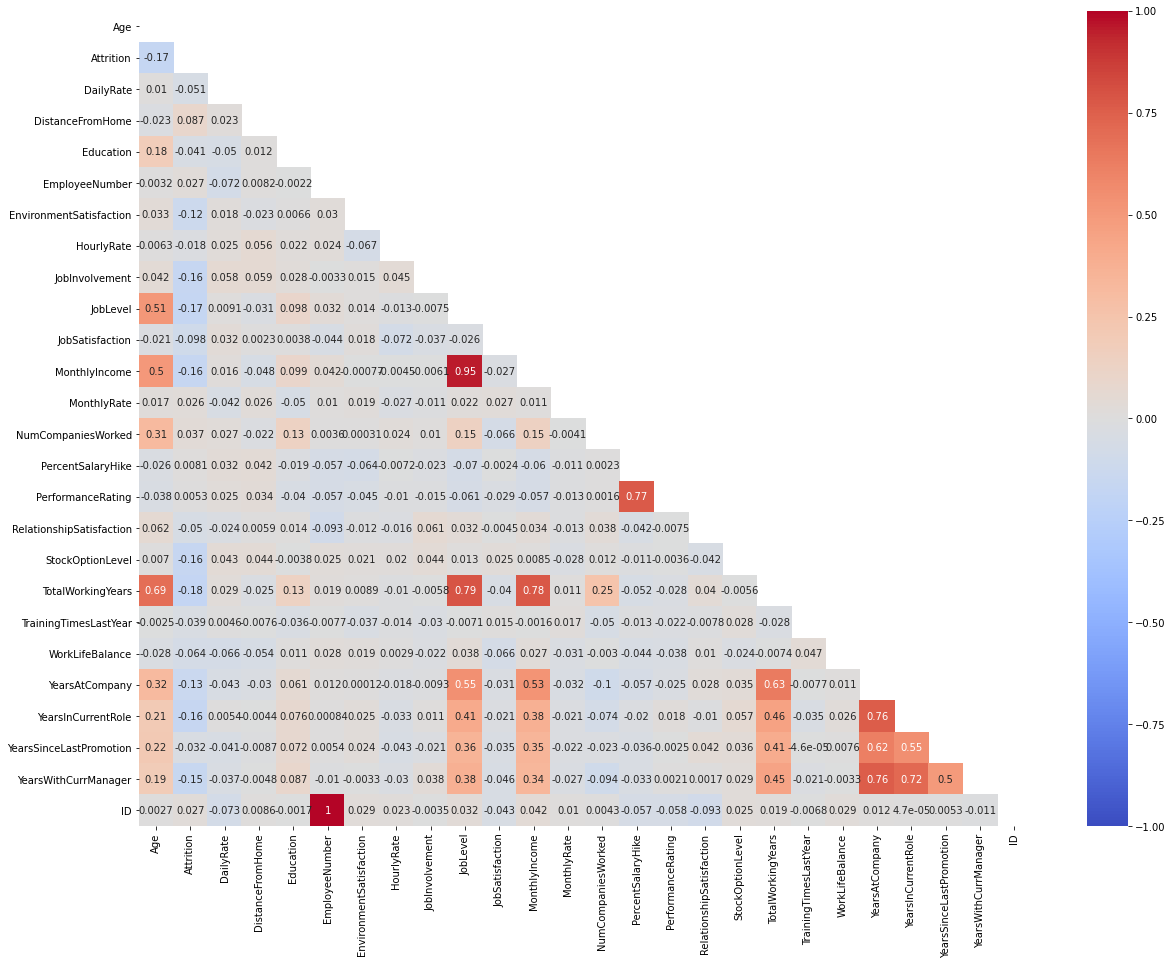

In [67]:
## Visulizing heat map
plt.figure(figsize=(20,15))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(  attrition_data.corr(),
              vmin=-1,
              cmap="coolwarm",
              annot=True,
              mask=mask
            )
plt.show()

 We can also visualize the data using `pair plot` which is similar as `heatmap` , using pairplot we can visualize correlation between the 2 attributes more cleared .

As attribute are more , so visualization is not clear 
refer : [Data-Visualization](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed)

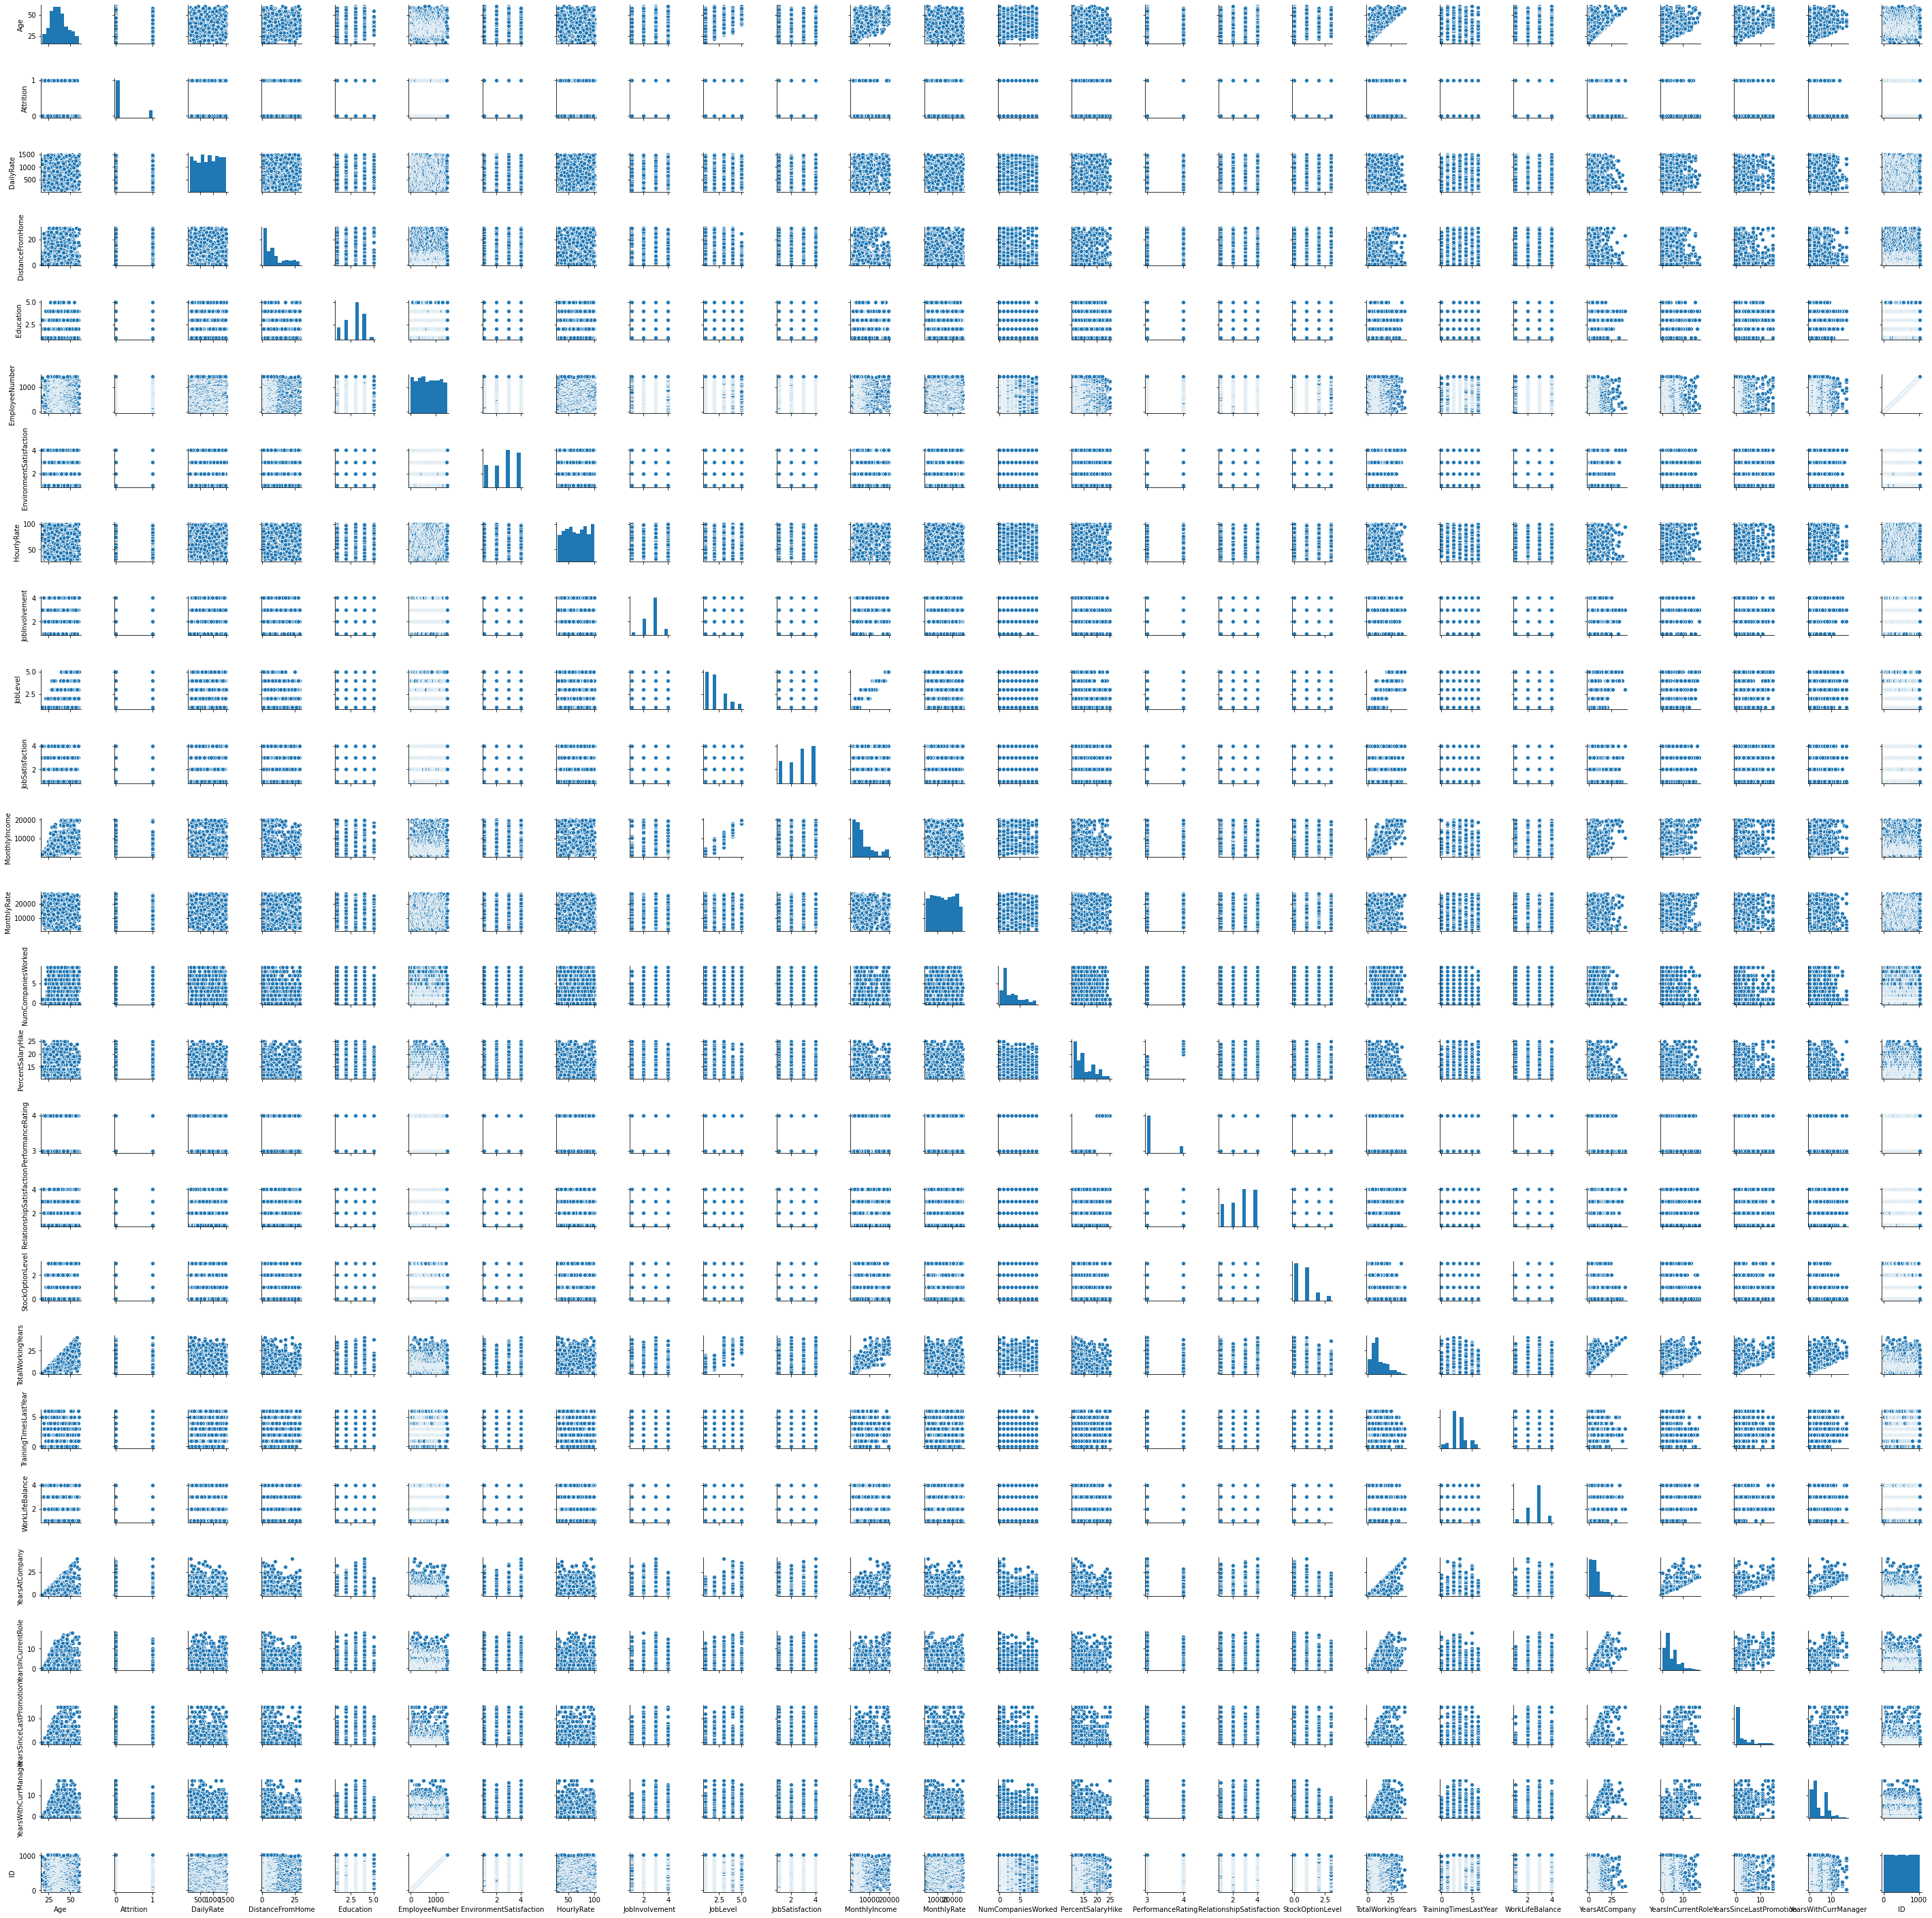

In [68]:
attrition_pair_plot = attrition_data.dropna()
sns.pairplot(attrition_pair_plot,height=1.5)
plt.show()

In [0]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Machine learning model : **RandomForestClassifier**

In [0]:
X = attrition_data.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'], axis=1)
y = attrition_data['Attrition']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=123)


In [88]:
test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    #we are changing the number of estimator which is hyperparameter
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)


    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))


print("train mean square error :{}".format(mean_absolute_error(y_train,train_predictions)))
print("test mean square error :{}".format(mean_absolute_error(y_test,test_predictions)))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))

print("The testing scores were: {}".format(test_scores))
# plot the loss as well

train mean square error :0.0
test mean square error :0.1553398058252427
The training scores were: [0.9, 0.92, 0.96, 0.95, 0.98, 0.98, 0.99, 1.0]
The testing scores were: [0.74, 0.82, 0.79, 0.83, 0.81, 0.83, 0.83, 0.84]


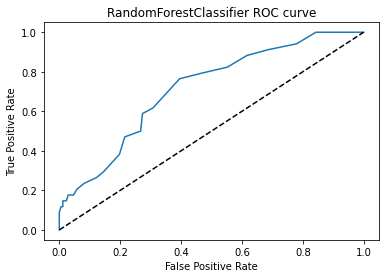

In [89]:
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
# show the plot
plt.show()

Machine learning model : **Gradient Boosting with XGBoost**


In [90]:
test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    #we are changing the number of estimator which is hyperparameter
    rfc = xgb.XGBClassifier(n_estimators=i, learning_rate=0.01)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)


    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))


print("train mean square error :{}".format(mean_absolute_error(y_train,train_predictions)))
print("test mean square error :{}".format(mean_absolute_error(y_test,test_predictions)))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))

print("The testing scores were: {}".format(test_scores))
# plot the loss as well

train mean square error :0.1435523114355231
test mean square error :0.16019417475728157
The training scores were: [0.85, 0.85, 0.85, 0.85, 0.85, 0.86, 0.85, 0.86]
The testing scores were: [0.83, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.84]


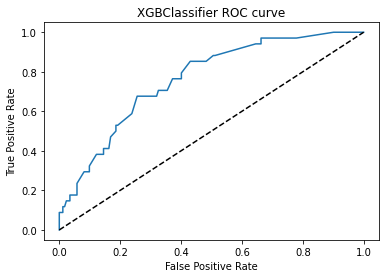

In [91]:
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier ROC curve')
# show the plot
plt.show()


Machine learning model : **DecisionTreeClassifier**

In [93]:
rfc = DecisionTreeClassifier()
rfc.fit(X_train, y_train) # print(rfc)

train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)


train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
test_scores.append(round(accuracy_score(y_test, test_predictions), 2))


print("train mean square error :{}".format(mean_absolute_error(y_train,train_predictions)))
print("test mean square error :{}".format(mean_absolute_error(y_test,test_predictions)))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))

print("The testing scores were: {}".format(test_scores))
# plot the loss as well

train mean square error :0.0
test mean square error :0.24271844660194175
The training scores were: [0.85, 0.85, 0.85, 0.85, 0.85, 0.86, 0.85, 0.86, 1.0]
The testing scores were: [0.83, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.84, 0.76]


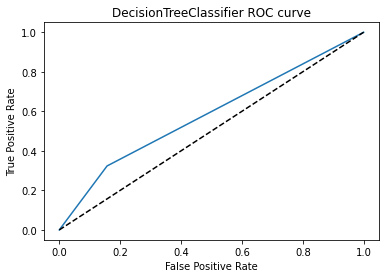

In [94]:
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier ROC curve')
# show the plot
plt.show()